In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [62]:
path ="male_players.csv"

In [63]:
df = pd.read_csv(path)

<ipython-input-63-7b06c29b8c94>:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Overview of my Dataset

In [64]:
# Overview of the dataset
print("Dataset Overview:")
print(df.describe())
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Overview:
           player_id   fifa_version  fifa_update        overall  \
count  180021.000000  180021.000000     180021.0  180021.000000   
mean   217326.670294      19.621450          2.0      65.712711   
std     35215.749284       2.838621          0.0       7.018104   
min         2.000000      15.000000          2.0      40.000000   
25%    200759.000000      17.000000          2.0      61.000000   
50%    222734.000000      20.000000          2.0      66.000000   
75%    239858.000000      22.000000          2.0      70.000000   
max    278145.000000      24.000000          2.0      94.000000   

           potential     value_eur      wage_eur            age  \
count  180021.000000  1.778680e+05  178173.00000  180021.000000   
mean       70.779581  2.379142e+06   10638.01081      25.138689   
std         6.255569  6.184358e+06   21637.41400       4.679389   
min        40.000000  1.000000e+03     500.00000      16.000000   
25%        66.000000  3.250000e+05    2000.

In [65]:
df.head(20)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
5,188545,/player/188545/robert-lewandowski/240002,24.0,2.0,2023-09-22,R. Lewandowski,Robert Lewandowski,ST,90,90,...,66+3,66+3,66+3,65+3,61+3,61+3,61+3,61+3,61+3,19+3
6,192119,/player/192119/thibaut-courtois/240002,24.0,2.0,2023-09-22,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,...,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,88+2
7,202126,/player/202126/harry-kane/240002,24.0,2.0,2023-09-22,H. Kane,Harry Kane,ST,90,90,...,69+3,69+3,69+3,67+3,64+3,63+3,63+3,63+3,64+3,20+3
8,238794,/player/238794/vinicius-jose-de-oliveira-junio...,24.0,2.0,2023-09-22,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,...,58+3,58+3,58+3,62+3,57+3,45+3,45+3,45+3,57+3,16+3
9,212831,/player/212831/alisson-ramses-becker/240002,24.0,2.0,2023-09-22,Alisson,Alisson Ramsés Becker,GK,89,90,...,39+3,39+3,39+3,34+3,33+3,33+3,33+3,33+3,33+3,87+3


Dropping unneccesary column

In [66]:
columns_to_drop = ['ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
                   'player_url', 'fifa_version', 'fifa_update', 'mentality_composure']
# Drop the specified columns
df = df.drop(columns=columns_to_drop)


In [67]:
print(df.columns)

Index(['player_id', 'update_as_of', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name',
       'league_id', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball

In [68]:
df.isnull().sum()

,0
player_id,0
update_as_of,0
short_name,0
long_name,0
player_positions,0
...,...
lcm,0
cm,0
rcm,0
rm,0


In [69]:
df.shape


(180021, 95)

In [70]:
# Assuming your dataset is in a pandas DataFrame named 'df'
columns_to_check = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
]

# Check for null values in the specified columns
null_values = df[columns_to_check].isnull().sum()

# Display the result
print(null_values)

attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeeping_handling           0
goalkeepin

In [71]:
df_cleaned = df.dropna(subset=columns_to_check)

In [72]:
# Assuming your dataset is in a pandas DataFrame named 'df'
columns_to_check = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'
]

# Check for null values in the specified columns
null_values = df[columns_to_check].isnull().sum()

# Display the result
print(null_values)

attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_positioning          0
mentality_vision               0
mentality_penalties            0
defending_marking_awareness    0
defending_standing_tackle      0
defending_sliding_tackle       0
goalkeeping_diving             0
goalkeeping_handling           0
goalkeepin

In [73]:
clean_columns = df.columns[df.notnull().all()].tolist()

# Display the clean columns
print("Clean columns (no null values):")
print(clean_columns)

Clean columns (no null values):
['player_id', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling

Suyog did from here on

In [74]:
clean_columns = df.columns[df.notnull().all()].tolist()


In [75]:
print(clean_columns)


['player_id', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality_id', 'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalk

In [76]:
df_clean = df[clean_columns]
print(df_clean.head())


   player_id update_as_of    short_name                       long_name  \
0     231747   2023-09-22     K. Mbappé            Kylian Mbappé Lottin   
1     239085   2023-09-22    E. Haaland            Erling Braut Haaland   
2     192985   2023-09-22  K. De Bruyne                 Kevin De Bruyne   
3     158023   2023-09-22      L. Messi  Lionel Andrés Messi Cuccittini   
4     165153   2023-09-22    K. Benzema                   Karim Benzema   

  player_positions  overall  potential  age         dob  height_cm  ...  rw  \
0           ST, LW       91         94   24  1998-12-20        182  ...  91   
1               ST       91         94   22  2000-07-21        195  ...  82   
2          CM, CAM       91         91   32  1991-06-28        181  ...  87   
3          CF, CAM       90         90   36  1987-06-24        169  ...  90   
4           CF, ST       90         90   35  1987-12-19        185  ...  86   

    lam   cam   ram    lm   lcm    cm   rcm    rm   lwb  
0  89+3  89+3  8

Analyze and Transform Data

In [77]:
df_clean['Performance_to_Potential'] = df_clean['overall'] / df_clean['potential']

<ipython-input-77-4ffed5ac9f86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Performance_to_Potential'] = df_clean['overall'] / df_clean['potential']


In [78]:
print(df_clean[['overall', 'potential', 'Performance_to_Potential']].head())


   overall  potential  Performance_to_Potential
0       91         94                  0.968085
1       91         94                  0.968085
2       91         91                  1.000000
3       90         90                  1.000000
4       90         90                  1.000000


Data Visualization

Frequency Vs Player Potential

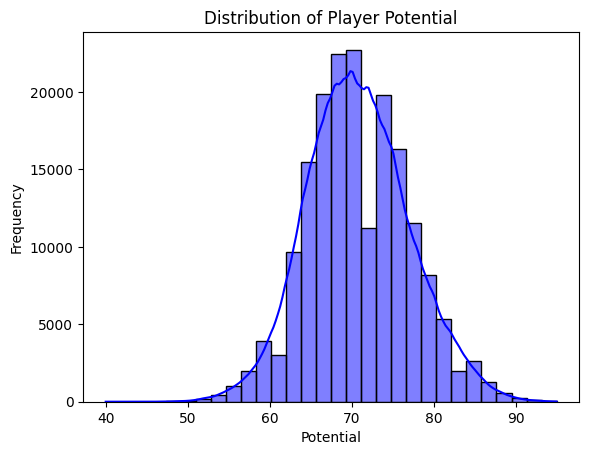

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of player potential
sns.histplot(df_clean['potential'], bins=30, kde=True, color='blue')
plt.title("Distribution of Player Potential")
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.show()

 Scatter Plot: Potential vs Overall According to Preferred Foot

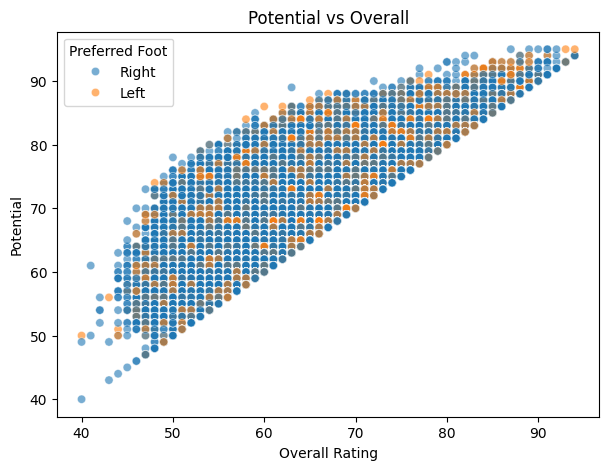

In [80]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x='overall', y='potential', hue='preferred_foot', alpha=0.6)
plt.title("Potential vs Overall")
plt.xlabel("Overall Rating")
plt.ylabel("Potential")
plt.legend(title="Preferred Foot")
plt.show()

<ipython-input-81-492eb42f13ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='body_type', y='age', palette='coolwarm')


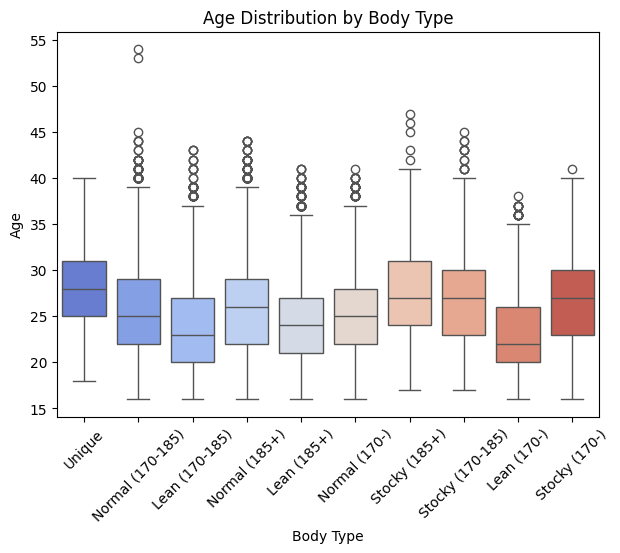

In [81]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='body_type', y='age', palette='coolwarm')
plt.title("Age Distribution by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

Box Plot: Age Distribution by Body Type

<ipython-input-82-492eb42f13ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='body_type', y='age', palette='coolwarm')


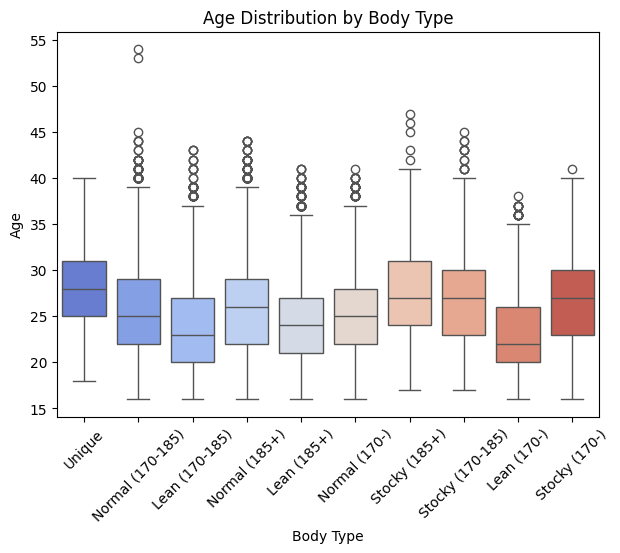

In [82]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='body_type', y='age', palette='coolwarm')
plt.title("Age Distribution by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

Heatmap: Correlation Matrix

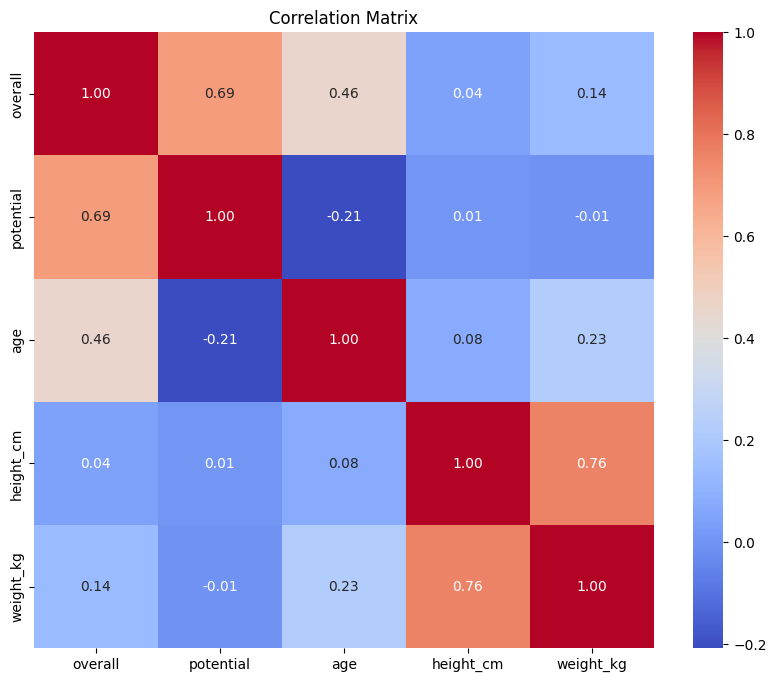

In [83]:
plt.figure(figsize=(10, 8))
corr = df_clean[['overall', 'potential', 'age', 'height_cm', 'weight_kg']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Count Plot: Work Rate Distribution

<ipython-input-84-c8839fecb1c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='work_rate', order=df_clean['work_rate'].value_counts().index, palette='magma')


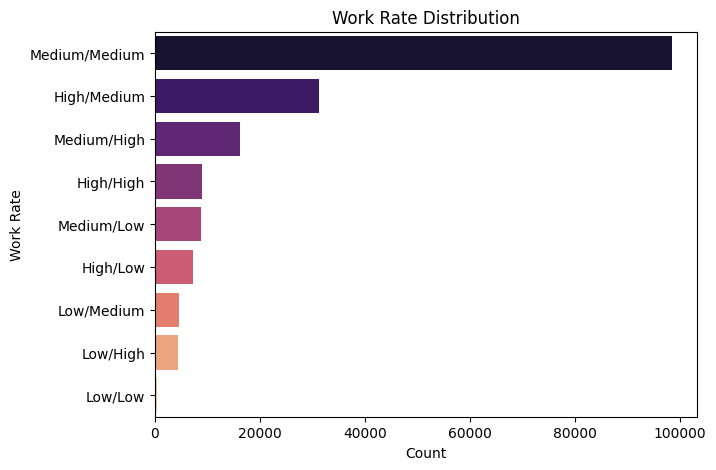

In [84]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_clean, y='work_rate', order=df_clean['work_rate'].value_counts().index, palette='magma')
plt.title("Work Rate Distribution")
plt.xlabel("Count")
plt.ylabel("Work Rate")
plt.show()

Pie Chart of Preferred Foot Distribution

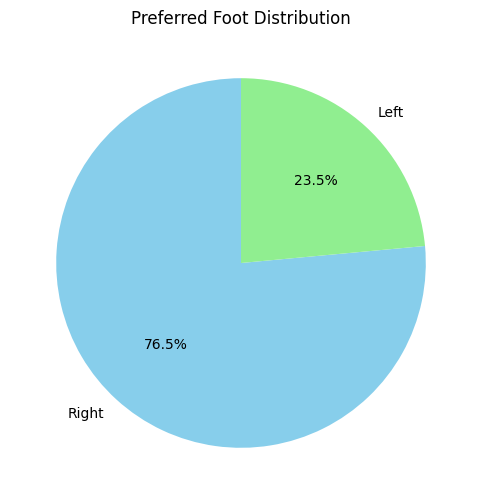

In [85]:
foot_distribution = df_clean['preferred_foot'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    foot_distribution,
    labels=foot_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen']
)
plt.title("Preferred Foot Distribution")
plt.show()


Scatter Plot: Age vs Overall Rating

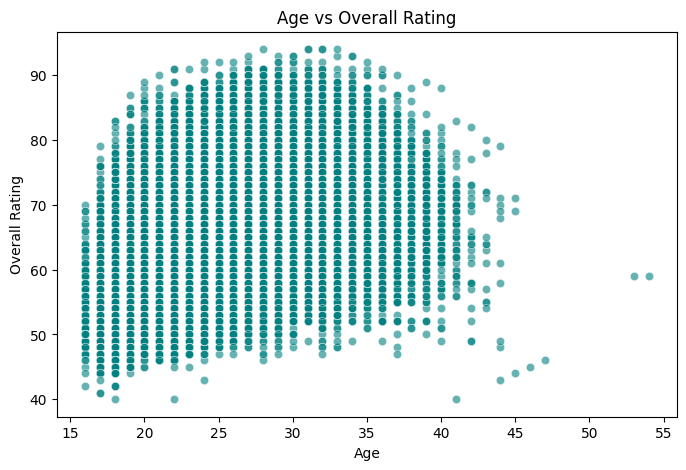

In [86]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='age', y='overall', alpha=0.6, color='teal')
plt.title("Age vs Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


Average Player Rating by Preferred Foot

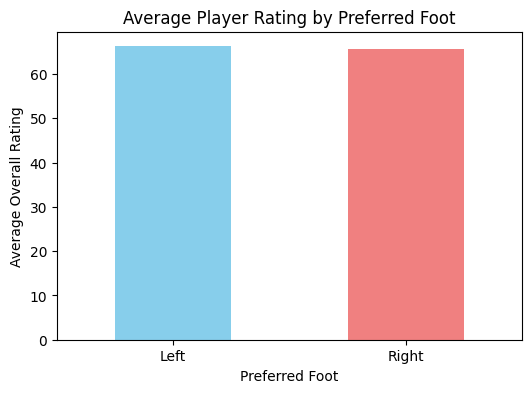

In [87]:
average_rating_by_foot = df_clean.groupby('preferred_foot')['overall'].mean()

plt.figure(figsize=(6, 4))
average_rating_by_foot.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Average Player Rating by Preferred Foot")
plt.xlabel("Preferred Foot")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=0)
plt.show()

SQL Integration

In [89]:
query = "PRAGMA table_info(players)"
table_info = pd.read_sql(query, conn)
print(table_info)


    cid              name     type  notnull dflt_value  pk
0     0         player_id  INTEGER        0       None   0
1     1      update_as_of     TEXT        0       None   0
2     2        short_name     TEXT        0       None   0
3     3         long_name     TEXT        0       None   0
4     4  player_positions     TEXT        0       None   0
..  ...               ...      ...      ...        ...  ..
90   90               lcm     TEXT        0       None   0
91   91                cm     TEXT        0       None   0
92   92               rcm     TEXT        0       None   0
93   93                rm     TEXT        0       None   0
94   94               lwb     TEXT        0       None   0

[95 rows x 6 columns]


In [91]:
query1 = "SELECT PlayerName, PlayerAge, ClubName FROM players WHERE PlayerAge > 30 ORDER BY PlayerAge DESC"


In [92]:
print(df.columns)


Index(['player_id', 'update_as_of', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name',
       'league_id', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball

In [94]:
import sqlite3
import pandas as pd

# Load your dataset
df = pd.read_csv("male_players.csv")

# Create SQLite database and establish connection
conn = sqlite3.connect("football_players.db")
cursor = conn.cursor()

# Create table (Modify column names/types based on your dataset)
cursor.execute("""
CREATE TABLE IF NOT EXISTS players (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    overall INTEGER,
    potential INTEGER,
    age INTEGER,
    height_cm REAL,
    weight_kg REAL
)
""")

# Load CSV data into the database
df.to_sql("players", conn, if_exists="replace", index=False)

# Example SQL Queries

# 1. Players older than 30
print("Players older than 30:")
query1 = """
SELECT age, overall, potential, height_cm, weight_kg
FROM players
WHERE age > 30
ORDER BY age DESC
"""
df_sql = pd.read_sql(query1, conn)
print(df_sql)

# 2. Aggregation: Average player overall rating by age
print("\nAverage player overall rating by age:")
query2 = """
SELECT age, AVG(overall) as avg_rating
FROM players
GROUP BY age
ORDER BY avg_rating DESC
"""
df_avg_rating = pd.read_sql(query2, conn)
print(df_avg_rating)

# 3. Players with the highest potential
print("\nPlayers with the highest potential:")
query3 = """
SELECT age, overall, potential, height_cm, weight_kg
FROM players
WHERE potential = (SELECT MAX(potential) FROM players)
"""
df_high_potential = pd.read_sql(query3, conn)
print(df_high_potential)

# 4. Players' height and weight analysis
print("\nPlayers taller than 180 cm:")
query4 = """
SELECT age, height_cm, weight_kg
FROM players
WHERE height_cm > 180
ORDER BY height_cm DESC
"""
df_height_weight = pd.read_sql(query4, conn)
print(df_height_weight)

# Close the connection
conn.close()


<ipython-input-94-430fe979ecce>:5: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("male_players.csv")


Players older than 30:
       age  overall  potential  height_cm  weight_kg
0       54       59         59        177         72
1       53       59         59        177         72
2       47       46         46        185         77
3       46       45         45        185         77
4       45       71         71        172         75
...    ...      ...        ...        ...        ...
26170   31       54         54        178         73
26171   31       54         54        191         80
26172   31       53         53        183         77
26173   31       52         52        172         75
26174   31       52         52        190         75

[26175 rows x 5 columns]

Average player overall rating by age:
    age  avg_rating
0    35   69.282028
1    31   69.193828
2    33   69.181483
3    34   69.163426
4    32   69.126048
5    30   69.104390
6    29   68.929353
7    28   68.710134
8    36   68.556554
9    27   68.394140
10   37   68.312579
11   39   68.275591
12   38   68.186

Object-Oriented Programming concept

In [95]:
class FootballPlayer:
    def __init__(self, name, age, nationality, club, overall, potential, value):
        self.name = name
        self.age = age
        self.nationality = nationality
        self.club = club
        self.overall = overall
        self.potential = potential
        self.value = self._convert_value(value)

    @staticmethod
    def _convert_value(value):
        """
        Convert the value from a string (e.g., '€50M') to a float in millions for easier processing.
        """
        if isinstance(value, str):
            if "M" in value:
                return float(value.replace("€", "").replace("M", ""))
            elif "K" in value:
                return float(value.replace("€", "").replace("K", "")) / 1000
        return value  # Return as-is if already numeric

    def is_veteran(self):
        """Check if the player is considered a veteran (age > 30)."""
        return self.age > 30

    def performance_gap(self):
        """Calculate the gap between player's current overall rating and potential."""
        return self.potential - self.overall

    def market_value_category(self):
        """
        Categorize player's market value.
        - High Value: > €50M
        - Medium Value: €10M - €50M
        - Low Value: < €10M
        """
        if self.value > 50:
            return "High Value"
        elif 10 <= self.value <= 50:
            return "Medium Value"
        else:
            return "Low Value"

    def display_info(self):
        """Display player information."""
        return (
            f"{self.name} ({self.nationality}) - {self.club} | Age: {self.age}, "
            f"Overall: {self.overall}, Potential: {self.potential}, Value: €{self.value}M"
        )


# Creating an object for a sample player from the dataset
sample_player = FootballPlayer("Lionel Messi", 36, "Argentina", "Inter Miami", 93, 95, "€50M")

# Displaying player information
print(sample_player.display_info())
print(f"Performance Gap: {sample_player.performance_gap()}")
print(f"Veteran Status: {sample_player.is_veteran()}")
print(f"Market Value Category: {sample_player.market_value_category()}")


Lionel Messi (Argentina) - Inter Miami | Age: 36, Overall: 93, Potential: 95, Value: €50.0M
Performance Gap: 2
Veteran Status: True
Market Value Category: Medium Value


Code for Saving Football Player Dataset Result: File Handling

In [98]:

output_path = "avg_rating_by_club.csv"
df_avg_rating.to_csv(output_path, index=False)
print(f"Average player ratings by club saved to {output_path}")

Average player ratings by club saved to avg_rating_by_club.csv
